### Haydn's Branch Main Notebook

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from scipy.stats import linregress
from scipy import stats

top200 = "datasets/Top200.csv"
topgenre = "datasets/Top10000genre.csv"

top200_df = pd.read_csv(top200)
topgenre_df = pd.read_csv(topgenre)

top200_df = top200_df.drop(columns=['Index','Song ID','Chord','Valence','Duration (ms)','Tempo','Liveness','Acousticness','Speechiness'])
topgenre_df = topgenre_df.drop(columns=['track_id','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence'])
# genre = []
# genre = (pd.unique(topgenre_df['genre']))
# genre200 = []
# genre200 = (pd.unique(top200_df['Genre']))
# genre200

#   below code separates songs into multiple genres with their own line, ie: if a song is latin pop, it gets an entire song line for 
#   latin and pop

# top200_df.columns
# top200_df.Genre.value_counts()
# # pop_genre = top200_df[top200_df['Genre'].str.contains('pop')]
# # pop_genre = top200_df[(top200_df['Genre'].str.contains('pop')) & (top200_df['Genre'].str.len()<2)]
# top200_df.Genre= top200_df.Genre.str.replace('[','')
# top200_df.Genre= top200_df.Genre.str.replace(']','')
# top200_df.Genre = top200_df.Genre.str.split(',')
# top200_df = top200_df.explode('Genre')
# top200_df.Genre = top200_df.Genre.str.replace("\'", "")

# top200_df.head()


# topgenre_df.info()


In [3]:
# #sorting music for specific genre
pop_genre = top200_df[top200_df.Genre=='pop']
hiphop_genre = top200_df[top200_df.Genre=='hip hop']
rap_genre = top200_df[top200_df.Genre=='rap']
pop_genre.shape[0]


0

In [4]:
#sorting music for word included (contains overlap)
pop_any = top200_df[top200_df.Genre.str.contains('pop')]
hiphop_any = top200_df[top200_df.Genre.str.contains('hip hop')]
rap_any = top200_df[top200_df.Genre.str.contains('rap')]
rb_any = top200_df[top200_df.Genre.str.contains('r&b')]
country_any = top200_df[top200_df.Genre.str.contains('country')]
rock_any = top200_df[top200_df.Genre.str.contains('rock')]
alt_any = top200_df[top200_df.Genre.str.contains('alternative')]
dance_any = top200_df[top200_df.Genre.str.contains('dance')]
edm_any = top200_df[top200_df.Genre.str.contains('edm')]
# house_any = top200_df[top200_df.Genre.str.contains('house')]
# come back and group rest of unique categories
jazz_any = top200_df[top200_df.Genre.str.contains('jazz')]
indie_any = top200_df[top200_df.Genre.str.contains('indie')]
itl_any = top200_df[top200_df.Genre.str.contains('italiano')]
span_any = top200_df[top200_df.Genre.str.contains('reggaeton')]
trap_any = top200_df[top200_df.Genre.str.contains('trap')]
latin_any = top200_df[top200_df.Genre.str.contains('latin')]
trap_any = top200_df[top200_df.Genre.str.contains('trap')]

In [5]:
#setting other category 
genre_list = ['pop','hip hop','rap','r&b','country','rock','alternative','dance','edm','jazz','indie','italiano','reggaeton','trap','latin']
pattern = '|'.join(genre_list)
result = top200_df.loc[~(top200_df['Genre'].str.contains(pattern, case=False))]
other = result
other_genre = (pd.unique(result['Genre']))
other.Genre.value_counts()

[]                                                                                                        75
['brooklyn drill']                                                                                        30
                                                                                                          11
['sertanejo', 'sertanejo universitario']                                                                   5
['australian psych', 'neo-psychedelic']                                                                    5
['adult standards', 'easy listening', 'lounge']                                                            3
['funk carioca']                                                                                           3
['forro', 'piseiro']                                                                                       3
['comic']                                                                                                  2
['piseiro']        

In [6]:
genre = (pd.unique(top200_df['Genre']))
# genre

In [7]:
unique_artists = top200_df.Artist.nunique()
unique_artists

716

In [8]:
artist = top200_df.loc[:, ['Artist','Number of Times Charted']]

artist = pd.DataFrame(artist.groupby(["Artist"]).sum())
artist = artist.sort_values(by=['Number of Times Charted'],ascending=False).reset_index()
# savage = artist.loc[artist['Artist']]
top_artists = artist.head(25)
top_artist_names = list(top_artists['Artist'])
top_artist_names
chart_data = list(top_artists['Number of Times Charted'])

top_artists.head()

,Artist,Number of Times Charted
0,Billie Eilish,432
1,Juice WRLD,431
2,Harry Styles,364
3,Ed Sheeran,314
4,Pop Smoke,308


Text(0, 0.5, 'Number of Times Charted')

<Figure size 10000x10000 with 0 Axes>

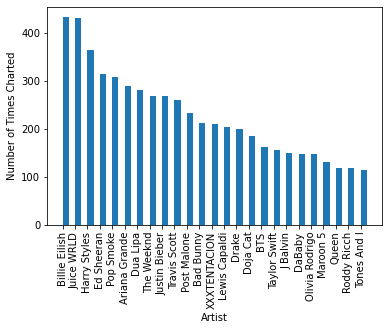

In [9]:
x_axis = np.arange(len(top_artists))
chart_data = top_artists['Number of Times Charted']

chart_numbers = list(top_artists['Number of Times Charted'])

figure(figsize=(20,20), dpi=500)

figure1,ax = plt.subplots()
plt.bar(x_axis,chart_data,align='edge',width=0.5)

ax.set_xticks(x_axis)
plt.xticks(rotation=90)
ax.set_xticklabels(top_artist_names)
# plt.annotate()
# ax.bar_label(chart_numbers)

plt.xlabel('Artist')
plt.ylabel('Number of Times Charted')

# fig.set_xticklabels(top_artist_names)
#       figure out how to rotate the bar labels, and space them out
# plt.xlabel(top_artist_names)

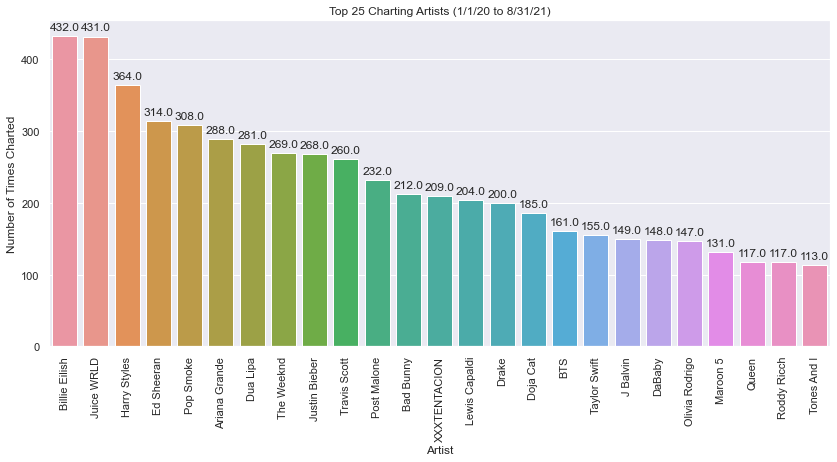

In [25]:
plt.figure(figsize=(14,6))
splot = sns.barplot(x= "Artist", y= "Number of Times Charted", data= top_artists)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va = 'center',
    xytext = (0,9),
    textcoords = 'offset points')
plt.xlabel('Artist')
plt.ylabel('Number of Times Charted')
plt.xticks(rotation=90)
plt.title("Top 25 Charting Artists (1/1/20 to 8/31/21)")

plt.savefig(r'C:\Users\hmwhi\OneDrive\Desktop\GitHub\Project 1\project_one\haydn_charts\Top_25_Artists.png')


In [11]:
# number of times charted vs artist followers

artist_data_df = top200_df.loc[:, ['Artist','Artist Followers','Number of Times Charted','Streams']]

artist_data_df.drop_duplicates(inplace=True)
artist_data_df.drop_duplicates(subset=['Artist'],inplace=True)
artist_data_df.head()
artist_data_df['Artist Followers'] = artist_data_df['Artist Followers'].str.replace(' ','')
artist_data_df['Artist Followers'] = artist_data_df['Artist Followers'].str.replace('"', '')
artist_data_df['Artist Followers'] = artist_data_df['Artist Followers'].str.replace(',', '')
artist_data_df['Artist Followers'] = artist_data_df['Artist Followers'].apply(pd.to_numeric)
artist_data_df['Streams'] = artist_data_df['Streams'].str.replace(' ','')
artist_data_df['Streams'] = artist_data_df['Streams'].str.replace('"', '')
artist_data_df['Streams'] = artist_data_df['Streams'].str.replace(',', '')
artist_data_df['Streams'] = artist_data_df['Streams'].apply(pd.to_numeric)
artist_data_df.head()

artist_data_df = artist_data_df.reset_index()

# artist_followers_df = artist_followers_df.sort_values(by=['Artist Followers'],ascending=False).reset_index()
artist_data_df.head()

,index,Artist,Artist Followers,Number of Times Charted,Streams
0,0,Måneskin,3377762.0,8,48633449
1,1,The Kid LAROI,2230022.0,3,47248719
2,2,Olivia Rodrigo,6266514.0,11,40162559
3,3,Ed Sheeran,83293380.0,5,37799456
4,4,Lil Nas X,5473565.0,1,33948454


Below, I found the artists with 'NaN' followers on Spotify and entered their current number of followers as of 9/18/2021. This may very slightly, but negligibly affect the outcome of the analysis.

In [12]:
artist_data_df.at[710,'Artist Followers']=2329595.0
artist_data_df.at[711,'Artist Followers']=654062.0
artist_data_df.at[712,'Artist Followers']=556390.0
artist_data_df.at[713,'Artist Followers']=295238.0
artist_data_df.at[714,'Artist Followers']=3673189.0
artist_data_df.at[715,'Artist Followers']=703373.0
artist_data_df.head(10)

,index,Artist,Artist Followers,Number of Times Charted,Streams
0,0,Måneskin,3377762.0,8,48633449
1,1,The Kid LAROI,2230022.0,3,47248719
2,2,Olivia Rodrigo,6266514.0,11,40162559
3,3,Ed Sheeran,83293380.0,5,37799456
4,4,Lil Nas X,5473565.0,1,33948454
5,6,Doja Cat,8640063.0,16,29356736
6,7,Rauw Alejandro,6080597.0,10,26951613
7,8,Bad Bunny,36142273.0,8,25030128
8,10,Dua Lipa,27142474.0,43,23518010
9,11,"J Balvin, Maria Becerra",29051363.0,9,22405111


In [13]:
artist_streams_df = top200_df.loc[:, ['Artist','Streams']]

artist_streams_df['Streams'] = artist_streams_df['Streams'].str.replace(' ','')
artist_streams_df['Streams'] = artist_streams_df['Streams'].str.replace('"', '')
artist_streams_df['Streams'] = artist_streams_df['Streams'].str.replace(',', '')
artist_streams_df['Streams'] = artist_streams_df['Streams'].apply(pd.to_numeric)

artist_streams_df = pd.DataFrame(artist_streams_df.groupby(['Artist']).mean()).reset_index()

# artist_streams_df['Streams'] = artist_streams_df['Streams']

artist_streams_df.head()

,Artist,Streams
0,*NSYNC,6.635128e+06
1,"13 Organisé, SCH, Kofs, Jul, Naps, Soso Maness...",5.112572e+06
2,"187 Strassenbande, Bonez MC, Frauenarzt",5.203700e+06
3,"21 Savage, Metro Boomin",6.125222e+06
4,24kGoldn,6.279456e+06


In [14]:
artist_data_df = artist_data_df[['Artist','Artist Followers']]
artist_data_df.head()

,Artist,Artist Followers
0,Måneskin,3377762.0
1,The Kid LAROI,2230022.0
2,Olivia Rodrigo,6266514.0
3,Ed Sheeran,83293380.0
4,Lil Nas X,5473565.0


In [15]:
new_artist_df = pd.merge(artist,artist_data_df,on='Artist')

new_artist_df = pd.merge(new_artist_df,artist_streams_df,on='Artist')

new_artist_df['Average Streams'] = new_artist_df['Streams']
new_artist_df['Times Charted'] = new_artist_df['Number of Times Charted']
new_artist_df = new_artist_df[['Artist','Times Charted','Artist Followers','Average Streams']]

new_artist_df.head()


,Artist,Times Charted,Artist Followers,Average Streams
0,Billie Eilish,432,47014200.0,5.420873e+06
1,Juice WRLD,431,19085118.0,5.556767e+06
2,Harry Styles,364,16112621.0,6.416442e+06
3,Ed Sheeran,314,83293380.0,8.953396e+06
4,Pop Smoke,308,6837946.0,5.987387e+06


In [16]:
followers_values = new_artist_df['Artist Followers']
times_charted_values = new_artist_df['Times Charted']
streams_values = new_artist_df['Average Streams']


nan nan nan nan nan


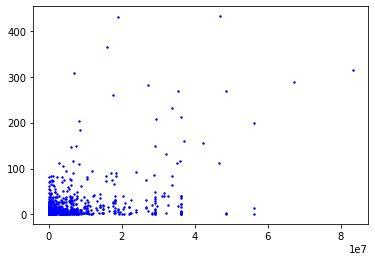

In [17]:
# matplotlib scatter plot
x_values = new_artist_df['Artist Followers']
y_values = new_artist_df['Times Charted']

plt.scatter(x_values,y_values,marker='o',facecolors='blue',s=2)

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(slope, intercept, r_value, p_value, std_err)


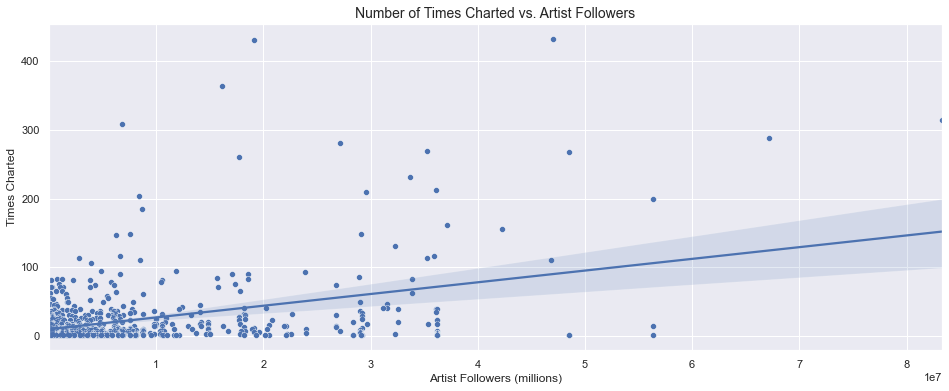

In [26]:
# seaborn scatter plot
sns.set(rc={'figure.figsize':(16,6)})
sns.scatterplot(
    data=new_artist_df,x="Artist Followers",y="Times Charted")

x_values = new_artist_df['Artist Followers']
y_values = new_artist_df['Times Charted']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

ax = sns.regplot(
    x="Artist Followers",y="Times Charted",data=new_artist_df, 
    marker='o',scatter_kws={'s':1},
    line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plt.annotate(line_eq,(30000000,300),fontsize=14)
plt.xlabel("Artist Followers (millions)")
plt.title("Number of Times Charted vs. Artist Followers",size=14)
plt.savefig(r'C:\Users\hmwhi\OneDrive\Desktop\GitHub\Project 1\project_one\haydn_charts\charted_vs_followers.png')


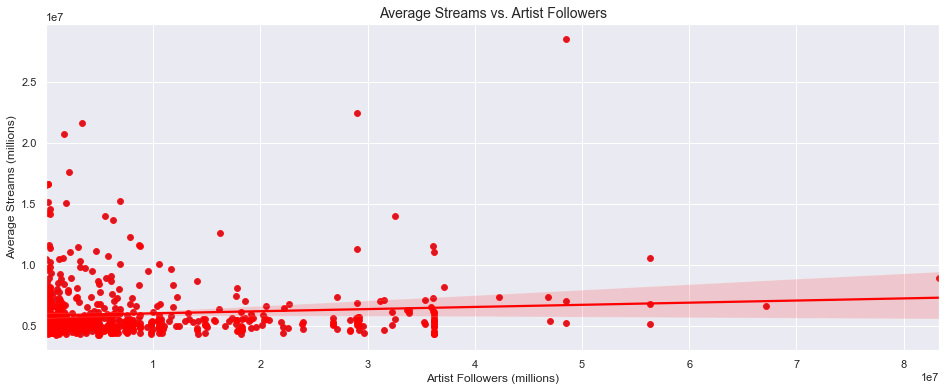

In [28]:
# seaborn plot 2

sns.scatterplot(data=new_artist_df,x='Artist Followers',y='Average Streams')

(slope, intercept, rvalue, pvalue, stderr) = linregress(followers_values, streams_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

sns.regplot(
    x="Artist Followers",y="Average Streams",data=new_artist_df,
    color='red',line_kws={'label':"Linear Reg"})

plt.xlabel("Artist Followers (millions)")
plt.ylabel("Average Streams (millions)")
plt.title("Average Streams vs. Artist Followers",size=14)

plt.savefig(r'C:\Users\hmwhi\OneDrive\Desktop\GitHub\Project 1\project_one\haydn_charts\streams_vs_followers.png')

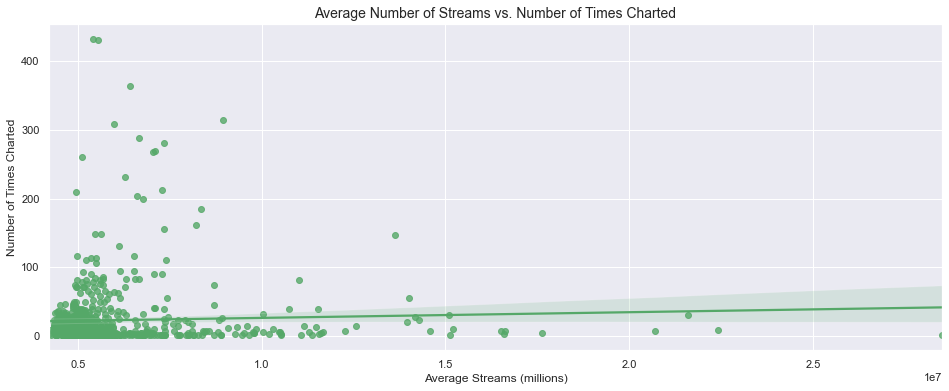

In [29]:
sns.regplot(
    x="Average Streams",y="Times Charted",data=new_artist_df,
    color='g',line_kws={'label':"Linear Reg"})


plt.xlabel("Average Streams (millions)")
plt.ylabel("Number of Times Charted")
plt.title("Average Number of Streams vs. Number of Times Charted",size=14)

plt.savefig(r'C:\Users\hmwhi\OneDrive\Desktop\GitHub\Project 1\project_one\haydn_charts\streams_vs_charted.png')
